# Project Description
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Problem Statement

To build a predictive model which will predict the sales of each product at a particular store from sales data for 1559 products across 10 stores in different cities.

# Hypothesis Generation

##### BigMart Sales Prediction
- It has 1559 products, 10 stores
- Stores are located in different cities.
- Target Feature - Sale of product

# Import modules

In [1]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn import metrics
import pickle

# Connect to Google collab and set Folder and File Paths

In [2]:
# Coonect to google collab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# Folder paths for Google Collab
project_folder_path = "/content/gdrive/MyDrive/AIML/Projects/Technocolabs/MiniProject1/"
data_file_path_train = project_folder_path + "Train.csv"
data_file_path_test = project_folder_path + "Test.csv"

# Folder paths to save the pickled model and predicted output
model_gbr_file_path = project_folder_path + "model_gbr.pkl"
test_data_prediction_file_path = project_folder_path + "Prediction_TestData.csv"

# Loading Packages and Data

In [4]:
# Read train data
train_data = pd.read_csv(data_file_path_train)
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Read test data
test_data = pd.read_csv(data_file_path_test)
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Data Structure and Content

In [6]:
print("****** Train Data ******")
print("Shape of the dataframe - ", train_data.shape)
print()
print("Data types of the dataframe - ", train_data.dtypes)

****** Train Data ******
Shape of the dataframe -  (8523, 12)

Data types of the dataframe -  Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train_data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [9]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
print("****** Test Data ******")
print("Shape of the dataframe - ", test_data.shape)
print()
print("Data types of the dataframe - ", test_data.dtypes)
print()
print("Test data columns - ", test_data.columns)
print()
test_data.info()

****** Test Data ******
Shape of the dataframe -  (5681, 11)

Data types of the dataframe -  Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Test data columns -  Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     -------------- 

# Exploratory Data Analysis

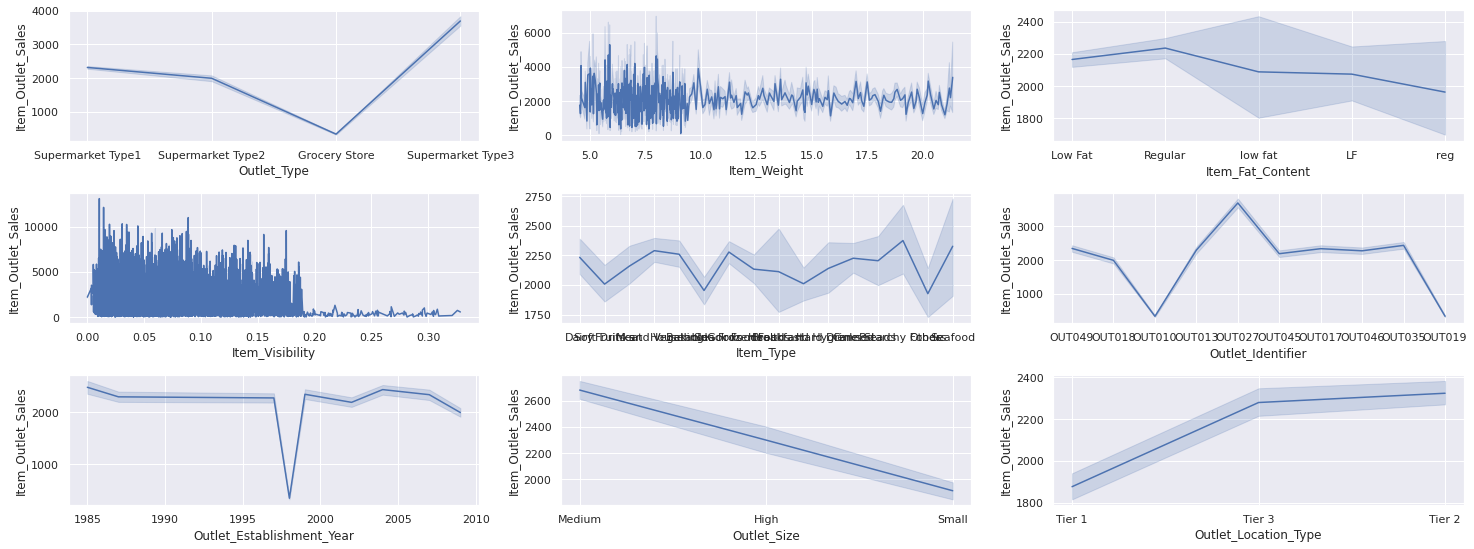

In [11]:
# Line plot - Features vs Target Feature - Item_Outlet_Sales
plt.figure(figsize = (25,5))
plt.title('Line plot - Features vs Target Feature - Item_Outlet_Sales')

plt.subplot(331)
sns.lineplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_data)

plt.subplot(332)
sns.lineplot(x='Item_Weight', y='Item_Outlet_Sales', data=train_data)

plt.subplot(333)
sns.lineplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train_data)

plt.subplot(334)
sns.lineplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train_data)

plt.subplot(335)
sns.lineplot(x='Item_Type', y='Item_Outlet_Sales', data=train_data)

plt.subplot(336)
sns.lineplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train_data)

plt.subplot(337)
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train_data)

plt.subplot(338)
sns.lineplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train_data)

plt.subplot(339)
sns.lineplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_data)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

**Insights from Line Plot - Feature vs TargetFeature-Sales**
- Outlet_Type - Grocery Store has low sale and Supermarket Type 3 has highest sale
- Item_weight - This feature is not giving much insight here.
- Item_Fat_content - This feature has 2 unique values : Low Fat and Regular. But, train data has incorrect values. It seems Regular Item fat content giving good sales as compare to Low fat content.
- Item_Visibility - Its range is 0.00 to 0.30
- Item_Type - It has many item types and it is not giving any specific insights.
- Outlet_Identifier - Few outle is giving good sale, some are giving approx. similar sale and some are giving low sale.
- Outlet_Establishment_Year - In between 1995 to 2000, data have very low or no sale. May be no outle is established in this period or wecdon't have data for this period.
- Outlet_Size - It is giving very specific insights. Meduim size of outlet is contibuted for high sales, however small size of outle is contributed low sale and high size of outlet is contibuted in sales which is avaerage of meduim and low.
- Outlet_Location_Type - Tier 2 and Tier 3 are contributing for high sale and Tier1is making less sale.

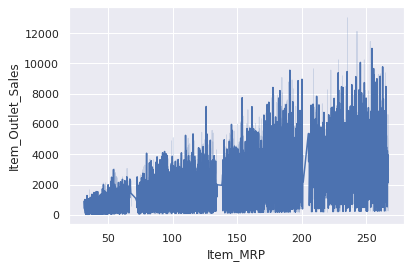

In [12]:
# Line plot - Item_MRP vs Item_Outlet_Sales
sns.lineplot(x='Item_MRP',y='Item_Outlet_Sales', data=train_data)

- Item_MRP and Item_Outlet_Sales have positive linera association.

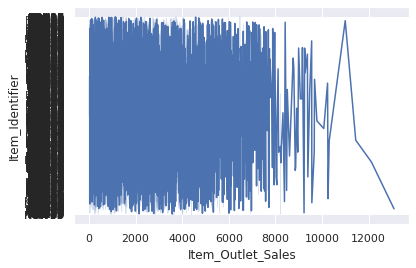

In [13]:
# Line Plot - Item_Identifier vs Item_Outlet_Sales
sns.lineplot(x='Item_Outlet_Sales',y='Item_Identifier', data=train_data)

- Not getting any insight from lineplot

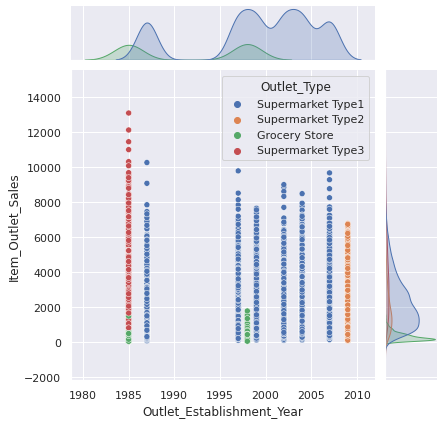

In [14]:
sns.jointplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales', data=train_data, hue='Outlet_Type')

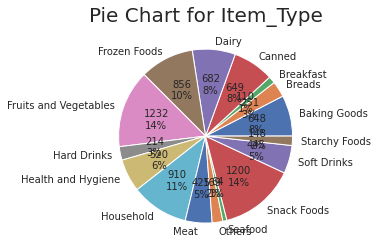

In [15]:
# Pie Chart on Item_Type
def getDataframePieChart(df, col):  
    # Set Dimensions
    ax_dims = (20, 20)
    # Plot pie diagram
    ax1 = df.groupby(col).size().plot(kind='pie', autopct=label_function, fontsize=10)
    ax1.set_title("Pie Chart for "+col, size=20)
    ax1.set_ylabel('', size=1)

# Function to display % of labels
def label_function(val):
    return f'{val / 100 * len(train_data):.0f}\n{val:.0f}%'

# Call Pie chart function
getDataframePieChart(train_data, "Item_Type")

- Data has maximum records of Fruits and Vegetables item type.

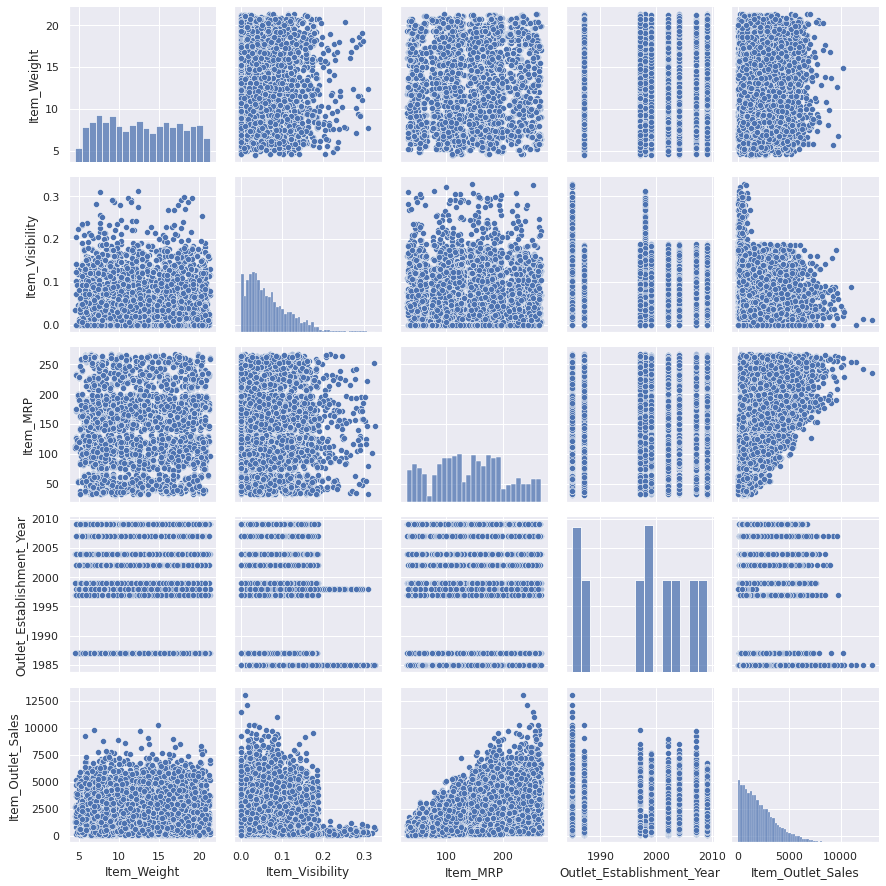

In [16]:
sns.pairplot(train_data)

**Insights on pairplot**
- Item_weight may have outliers. Need further analysis.
- Item Visibilty has negative non-linear association.
- Item_MRP has positive non-linear association.
- Outlet Establishment Year has data starting from year approx. 1980 to 2010


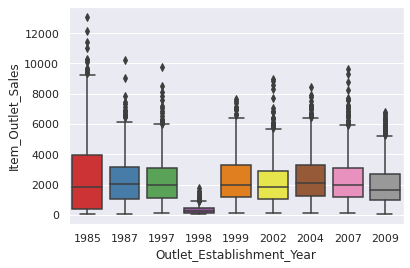

In [17]:
# Box plot - Outlet_Establishment_Year vs Item_Outlet_Sales
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train_data, palette="Set1")

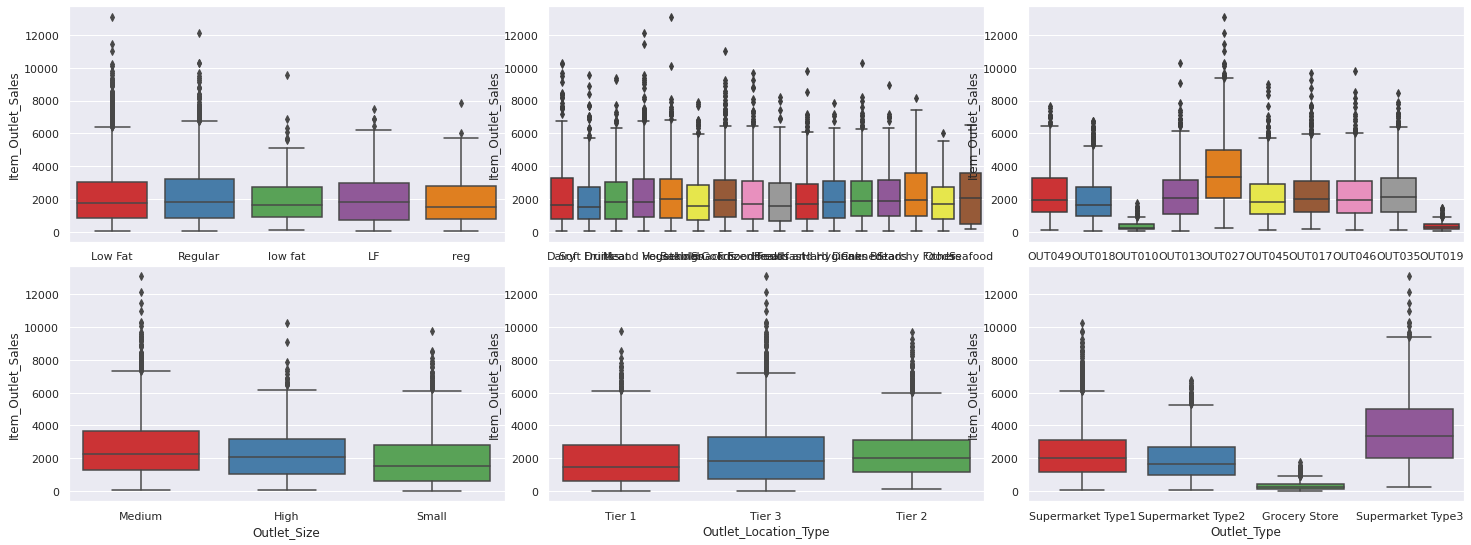

In [18]:
# Box plot for all features
plt.figure(figsize = (25,5))

plt.subplot(231)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train_data, palette="Set1")

plt.subplot(232)
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train_data, palette="Set1")

plt.subplot(233)
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train_data, palette="Set1")

plt.subplot(234)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train_data, palette="Set1")

plt.subplot(235)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_data, palette="Set1")

plt.subplot(236)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_data, palette="Set1")

plt.subplots_adjust(wspace = 0.10, hspace = 0.10, top = 1.5)
plt.show()

# Univariate Analysis

In [19]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

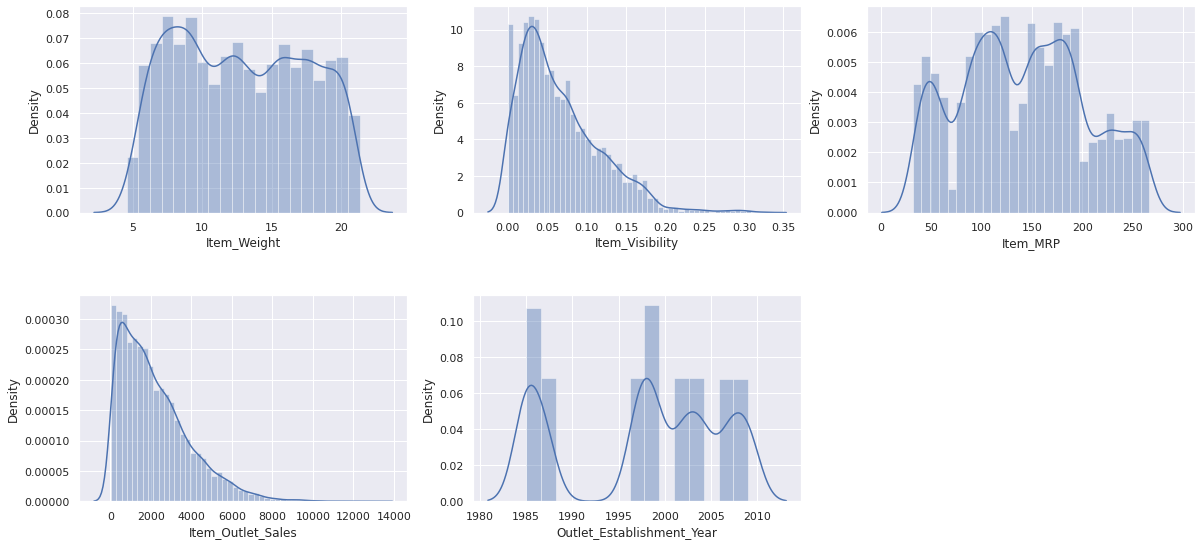

In [20]:
# distplot for Numerical-int, float dtypes features
plt.figure(figsize = (20,5))

plt.subplot(231)
sns.distplot(train_data['Item_Weight'])

plt.subplot(232)
sns.distplot(train_data['Item_Visibility'])

plt.subplot(233)
sns.distplot(train_data['Item_MRP'])

plt.subplot(234)
sns.distplot(train_data['Item_Outlet_Sales'])

plt.subplot(235)
sns.distplot(train_data['Outlet_Establishment_Year'])

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

- Item_Outlet_Sales - Right-skewed/Positive skewed distibution - Outliers are towards the right and closer to the mean on the left

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

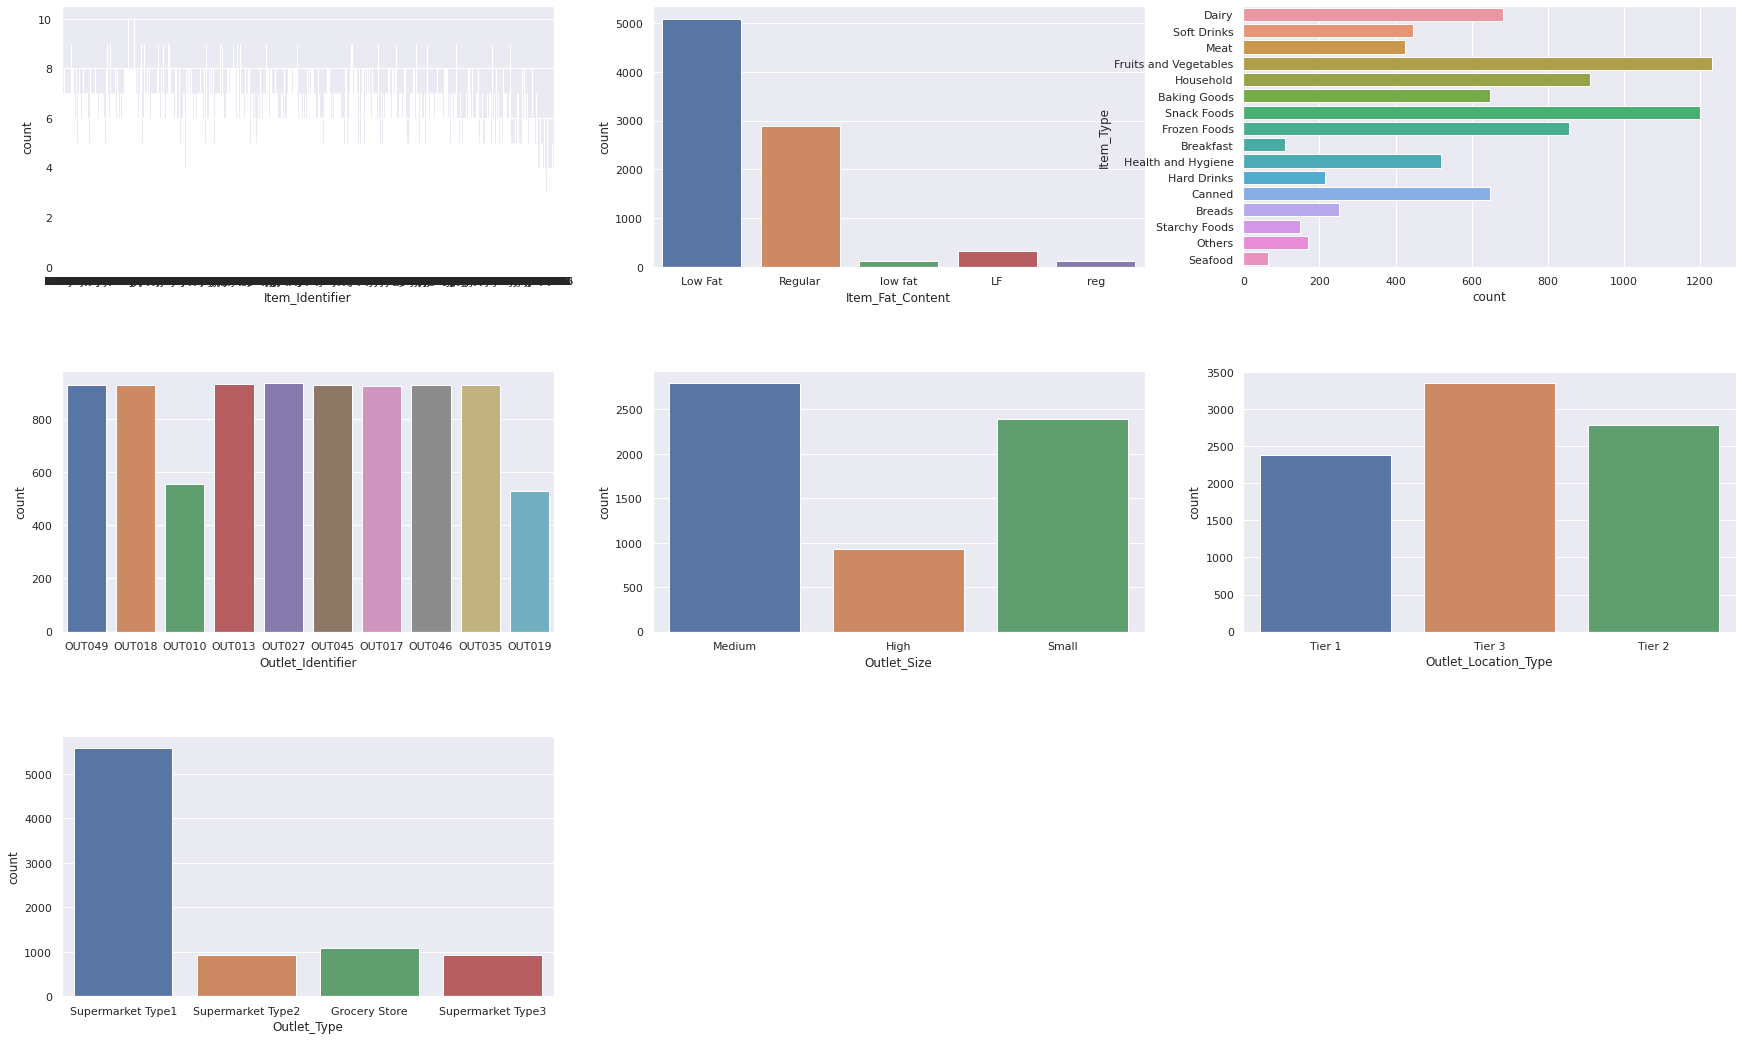

In [21]:
# countplot for categorical-Object dtypes
plt.figure(figsize = (30,10))

plt.subplot(331)
sns.countplot(train_data['Item_Identifier'])

plt.subplot(332)
sns.countplot(train_data['Item_Fat_Content'])

plt.subplot(333)
sns.countplot(y=train_data['Item_Type'])

plt.subplot(334)
sns.countplot(train_data['Outlet_Identifier'])

plt.subplot(335)
sns.countplot(train_data['Outlet_Size'])

plt.subplot(336)
sns.countplot(train_data['Outlet_Location_Type'])

plt.subplot(337)
sns.countplot(train_data['Outlet_Type'])

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

- Categorical features has multiple category 

# Bivariate Analysis

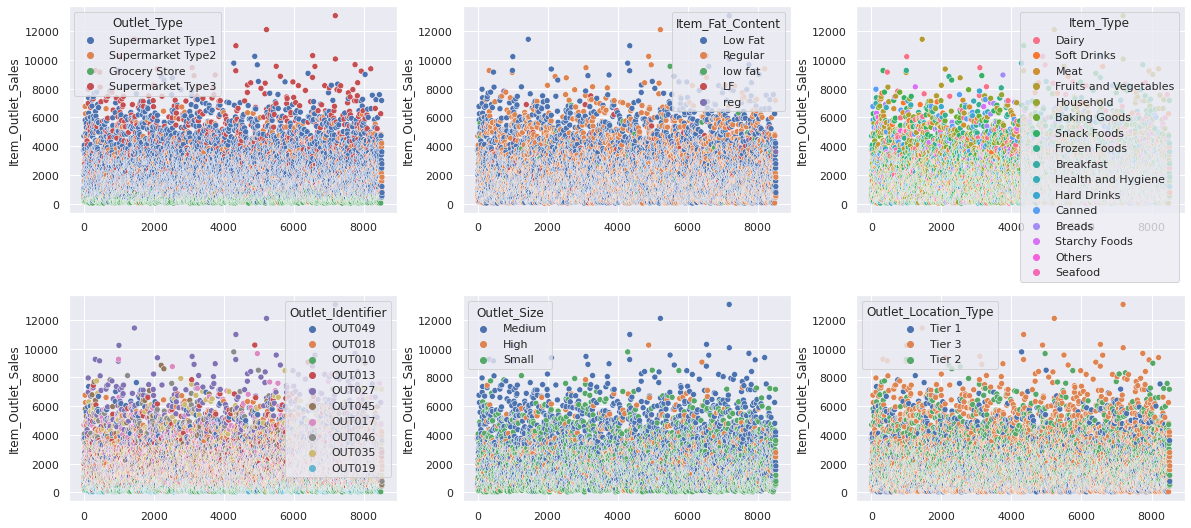

In [22]:
plt.figure(figsize = (20,5))

plt.subplot(231)
sns.scatterplot(x=train_data.index,y='Item_Outlet_Sales', data=train_data, hue='Outlet_Type')

plt.subplot(232)
sns.scatterplot(x=train_data.index,y='Item_Outlet_Sales', data=train_data, hue='Item_Fat_Content')

plt.subplot(233)
sns.scatterplot(x=train_data.index,y='Item_Outlet_Sales', data=train_data, hue='Item_Type')

plt.subplot(234)
sns.scatterplot(x=train_data.index,y='Item_Outlet_Sales', data=train_data, hue='Outlet_Identifier')

plt.subplot(235)
sns.scatterplot(x=train_data.index,y='Item_Outlet_Sales', data=train_data, hue='Outlet_Size')

plt.subplot(236)
sns.scatterplot(x=train_data.index,y='Item_Outlet_Sales', data=train_data, hue='Outlet_Location_Type')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

In [23]:
type(sorted(set(train_data['Item_Identifier'])))
list1= sorted(set(train_data['Item_Identifier']))
print(len(list1))
print(list1[:500])
print(list1[500:1000])
print(list1[1000:])

1559
['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48', 'DRC01', 'DRC12', 'DRC13', 'DRC24', 'DRC25', 'DRC27', 'DRC36', 'DRC49', 'DRD01', 'DRD12', 'DRD13', 'DRD15', 'DRD24', 'DRD25', 'DRD27', 'DRD37', 'DRD49', 'DRD60', 'DRE01', 'DRE03', 'DRE12', 'DRE13', 'DRE15', 'DRE25', 'DRE27', 'DRE37', 'DRE48', 'DRE49', 'DRE60', 'DRF01', 'DRF03', 'DRF13', 'DRF15', 'DRF23', 'DRF25', 'DRF27', 'DRF36', 'DRF37', 'DRF48', 'DRF49', 'DRF51', 'DRF60', 'DRG01', 'DRG03', 'DRG11', 'DRG13', 'DRG15', 'DRG23', 'DRG25', 'DRG27', 'DRG36', 'DRG37', 'DRG39', 'DRG48', 'DRG49', 'DRG51', 'DRH01', 'DRH03', 'DRH11', 'DRH13', 'DRH15', 'DRH23', 'DRH25', 'DRH36', 'DRH37', 'DRH39', 'DRH49', 'DRH51', 'DRH59', 'DRI01', 'DRI03', 'DRI11', 'DRI13', 'DRI23', 'DRI25', 'DRI37', 'DRI39', 'DRI47', 'DRI49', 'DRI51', 'DRI59', 'DRJ01', 'DRJ11', 'DRJ13', 'DRJ23', 'DRJ24', 'DRJ25', 'DRJ35', 'DRJ37', 'DRJ39', 'DRJ47', 'DRJ49', 'DRJ51', 'DRJ59', 'DRK01', 'DRK11', 'DRK12', 'DRK13', 'DRK23', 'DRK35', 'DRK37', 'DRK39', 'DRK

- Item_Identifier features has values in a pattern that first 3 alphabet charcter and next/last 2 are numerical character.

In [24]:
 # data for 1559 products across 10 stores in different cities.

In [25]:
def get_product(df):
  print("Sample of Item_Identifier - ", df['Item_Identifier'][1])
  df["Product"] = df['Item_Identifier'].apply(lambda x: x[0:3]).copy()
  print("Sample of Product - ", df['Product'][1])
  return df
# train_data["Product"] = train_data['Item_Identifier'].apply(lambda x: x[0:3]).copy()
train_data = get_product(train_data)
print("Variation in Product feature in Train data Dataset - \n")
train_data.groupby('Product').nunique()

Sample of Item_Identifier -  DRC01
Sample of Product -  DRC
Variation in Product feature in Train data Dataset - 



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Product,,,,,,,,,,,,
DRA,3,3,3,19,1,21,10,9,3,3,4,18
DRB,5,5,2,25,1,25,9,9,3,3,4,23
DRC,8,7,4,35,2,37,10,9,3,3,4,37
DRD,10,10,3,61,2,61,10,9,3,3,4,59
DRE,11,11,3,58,2,60,10,9,3,3,4,58
...,...,...,...,...,...,...,...,...,...,...,...,...
NCV,10,10,2,52,2,48,10,9,3,3,4,46
NCW,10,9,3,43,2,43,10,9,3,3,4,41
NCX,10,10,3,57,2,55,10,9,3,3,4,55


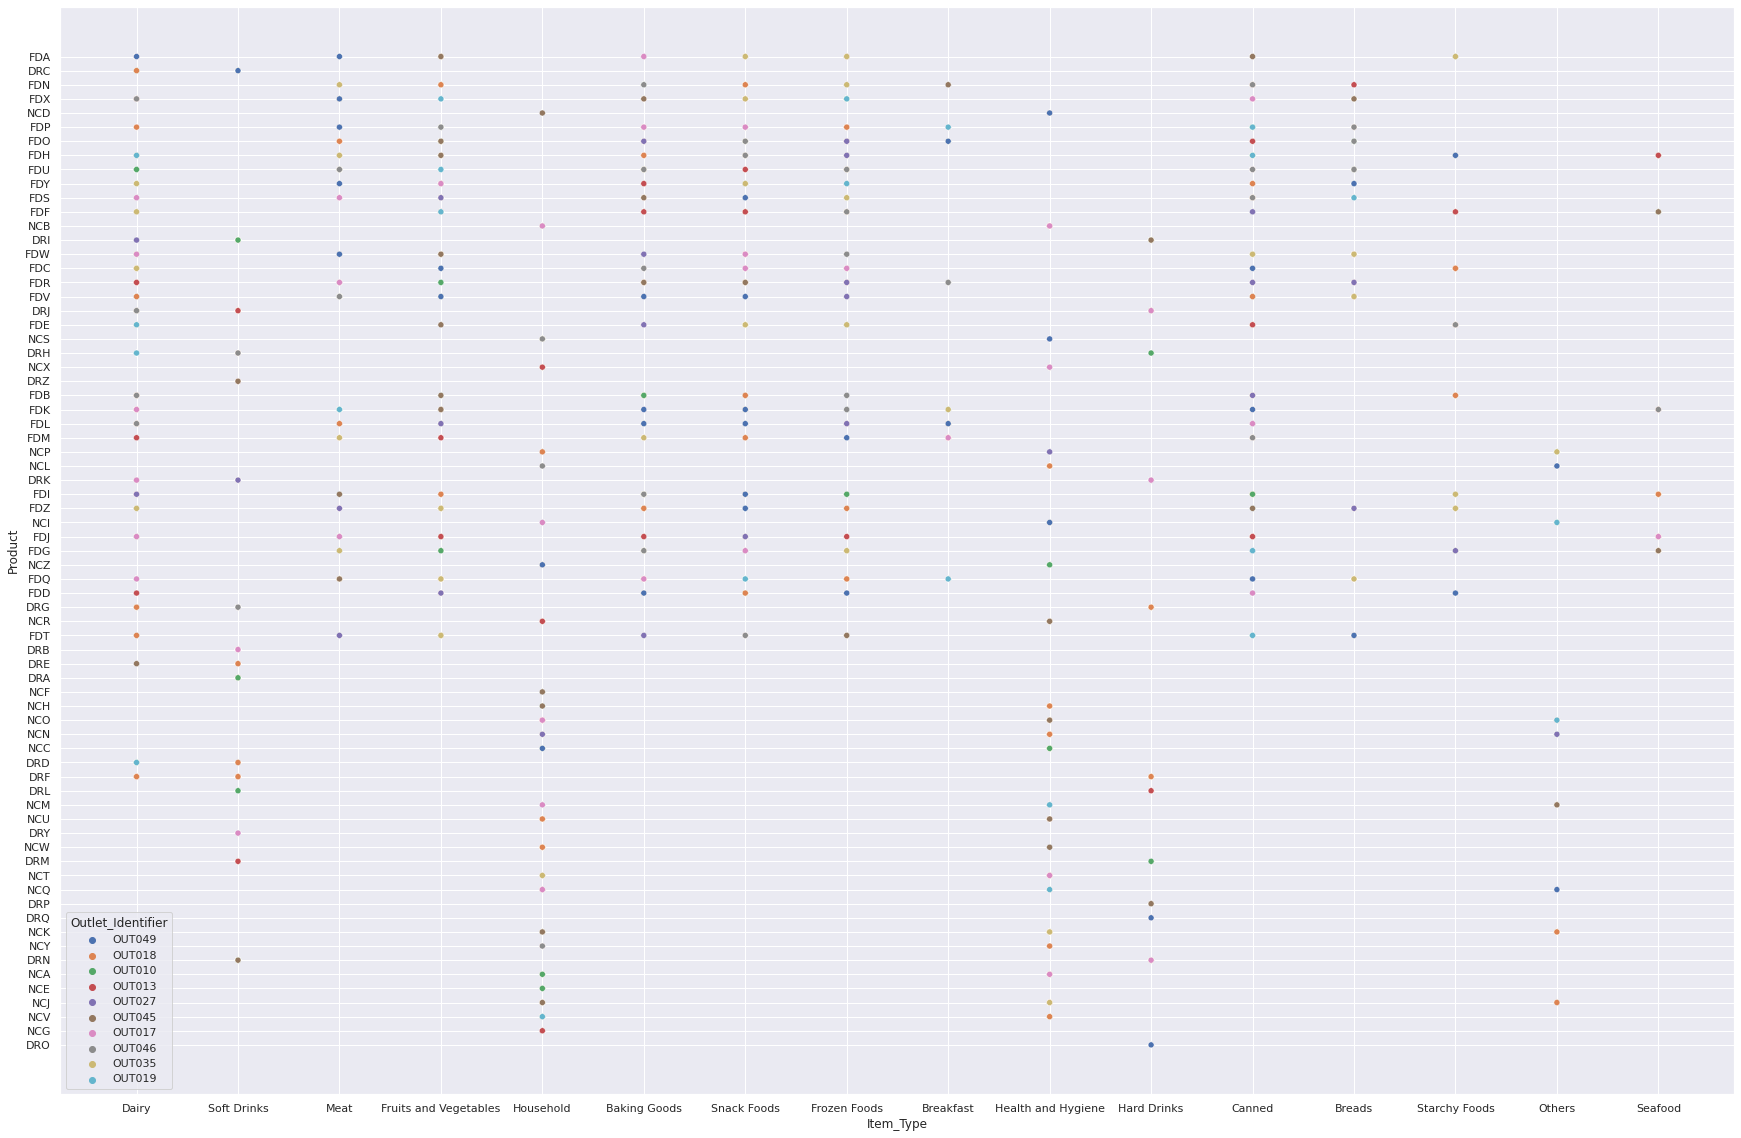

In [26]:
# scatterplot Item_Type vs Product
fig, ax = plt.subplots(figsize=(30, 20))
sns.scatterplot(ax=ax, x='Item_Type', y='Product', data=train_data, hue='Outlet_Identifier')

In [27]:
print("Variation in Group feature in Train data Dataset - \n")
train_data.groupby('Outlet_Location_Type').nunique()['Outlet_Identifier']

Variation in Group feature in Train data Dataset - 



Outlet_Location_Type
Tier 1    3
Tier 2    3
Tier 3    4
Name: Outlet_Identifier, dtype: int64

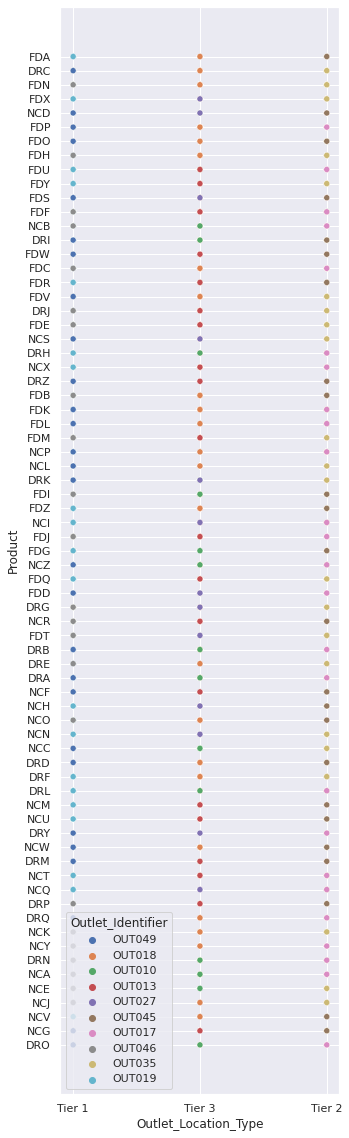

In [28]:
# scatterplot Outlet_Location_Type vs Product
fig, ax = plt.subplots(figsize=(5, 20))
sns.scatterplot(ax=ax, x='Outlet_Location_Type', y='Product', data=train_data, hue='Outlet_Identifier')

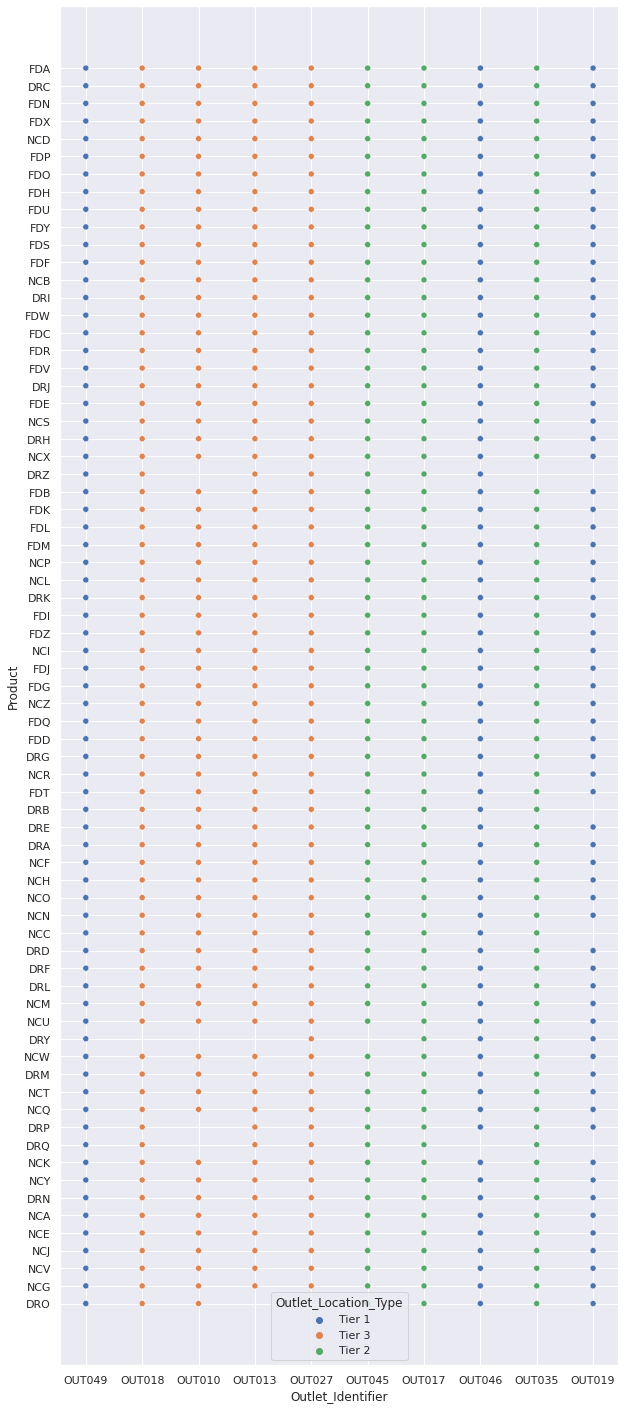

In [29]:
# scatterplot - Outlet_Identifier vs Product
fig, ax = plt.subplots(figsize=(10, 25))
sns.scatterplot(ax=ax, x='Outlet_Identifier', y='Product', data=train_data, hue='Outlet_Location_Type')

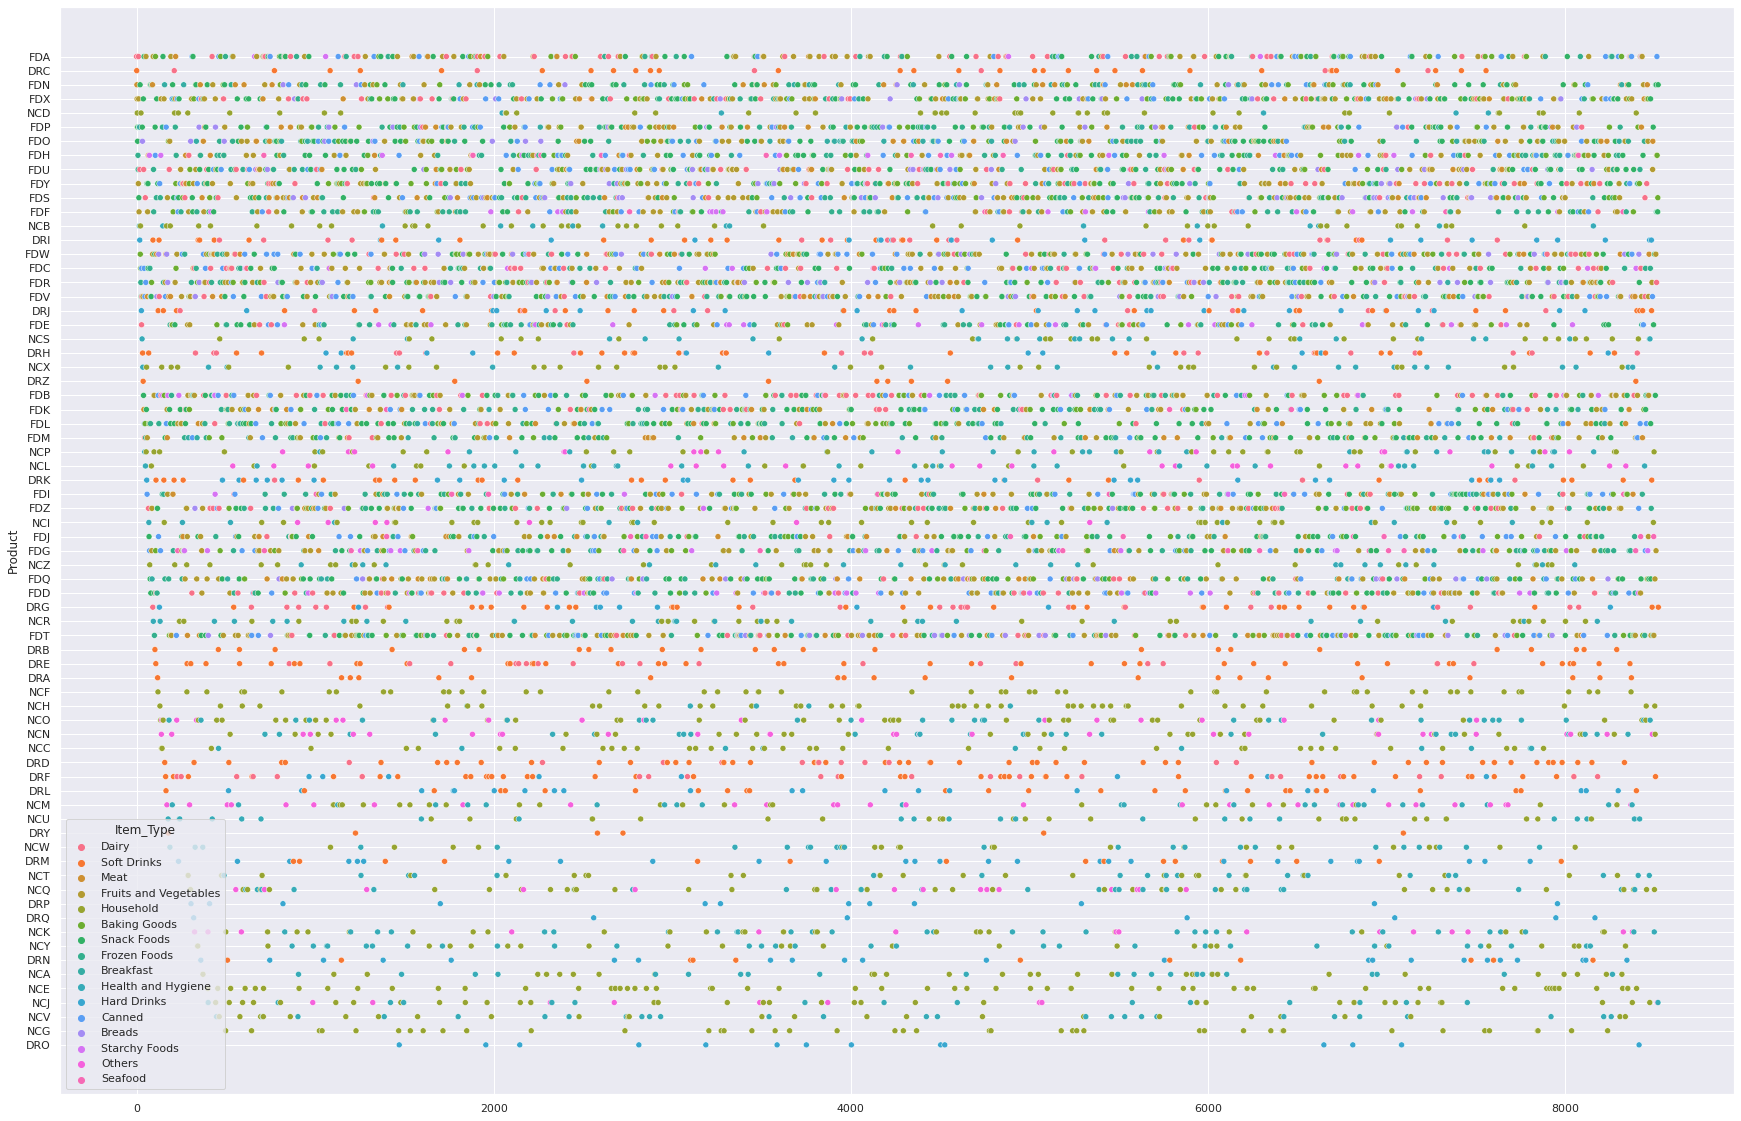

In [30]:
# scatterplot - No. of records vs Product
fig, ax = plt.subplots(figsize=(30, 20))
sns.scatterplot(ax=ax, x=train_data.index,y='Product', data=train_data, hue='Item_Type')

# Missing Value Treatment

In [31]:
print("Missing data - ")
train_data.isna().sum()

Missing data - 


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Product                         0
dtype: int64

- Item_Weight and Outlet_Size has missing values.

In [32]:
print("min value - Item_Weight - ", train_data['Item_Weight'].min())
print("max value - Item_Weight - ",train_data['Item_Weight'].max())

min value - Item_Weight -  4.555
max value - Item_Weight -  21.35


In [33]:
# Impute Item_Weight with median
def imputer_Item_Weight(df):
  print("Before Imputing the Item_Weight - ", df.Item_Weight.isna().sum())
  imputer = SimpleImputer(strategy='median', missing_values=np.nan)
  imputer = imputer.fit(df[['Item_Weight']])
  df[['Item_Weight']] = imputer.transform(df[['Item_Weight']])
  print("After Imputing the Item_Weight - ", df.Item_Weight.isna().sum())
  return df

# Impute imputr_Outlet_Size with most_frequent
def imputer_Outlet_Size(df):
  print("Before Imputing the imputr_Outlet_Size - ", df.Outlet_Size.isna().sum())
  imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
  imputer = imputer.fit(df[['Outlet_Size']])
  df[['Outlet_Size']] = imputer.transform(df[['Outlet_Size']])
  print("After Imputing the imputr_Outlet_Size - ", df.Outlet_Size.isna().sum())
  return df

# Function to impute Item_Weight with median
train_data = imputer_Item_Weight(train_data)

# Function to impute imputr_Outlet_Size with most_frequent
train_data = imputer_Outlet_Size(train_data)

Before Imputing the Item_Weight -  1463
After Imputing the Item_Weight -  0
Before Imputing the imputr_Outlet_Size -  2410
After Imputing the imputr_Outlet_Size -  0


In [34]:
# Missing data
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Product                      0
dtype: int64

In [35]:
# Check for duplicate data
print("Duplicate data present in training data - ", train_data.duplicated().sum())

Duplicate data present in training data -  0


# Feature Engineering

In [36]:
# Unique values in train data
train_data.value_counts()
for col in train_data.columns:
  if train_data[col].dtype == 'object':
    print("*"*40)
    print(col ," Unique values : ")
    print(train_data[col].value_counts())

****************************************
Item_Identifier  Unique values : 
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
****************************************
Item_Fat_Content  Unique values : 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
****************************************
Item_Type  Unique values : 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
N

In [37]:
# Mapping correct values - Item_Fat_Content 
def preprocess_Item_Fat_Content(df):
  print("Before - Mapping correct values - Item_Fat_Content :\n", df['Item_Fat_Content'].value_counts())
  df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg': 'Regular'})
  print("After - Mapping correct values - Item_Fat_Content :\n", df['Item_Fat_Content'].value_counts())
  return df

# Function to map correct values
train_data = preprocess_Item_Fat_Content(train_data)

Before - Mapping correct values - Item_Fat_Content :
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
After - Mapping correct values - Item_Fat_Content :
 Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [38]:
print("Unique values of Outlet_Establishment_Year -\n", train_data['Outlet_Establishment_Year'].value_counts())

Unique values of Outlet_Establishment_Year -
 1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


Oldest year -  1985
Newest year -  2009
Time period -  24
No. of unique year -  9


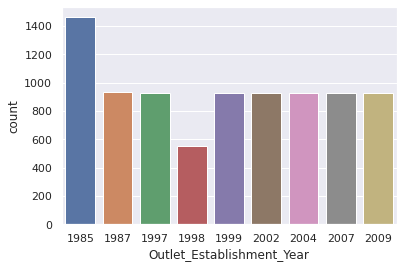

In [39]:
print("Oldest year - ", train_data['Outlet_Establishment_Year'].min())
print("Newest year - ", train_data['Outlet_Establishment_Year'].max())
print("Time period - ", train_data['Outlet_Establishment_Year'].max()-train_data['Outlet_Establishment_Year'].min())
print("No. of unique year - ", train_data['Outlet_Establishment_Year'].value_counts().count())
sns.countplot(x='Outlet_Establishment_Year', data =train_data)

In [40]:
# Calculate age of Outlet
def get_outlet_age(df):
  print("Sample of Outlet_Establishment_Year - ", df['Outlet_Establishment_Year'][1])
  df['Outlet_Age_Year'] = (df['Outlet_Establishment_Year'].max()) - df['Outlet_Establishment_Year']
  print("Sample of Outlet_Age_Year - ", df['Outlet_Age_Year'][1])
  print("Unique values of Outlet_Age_Year -\n", df['Outlet_Age_Year'].value_counts())
  df['Outlet_Age_Year'] = df['Outlet_Age_Year'].astype(str)
  return df

# Call function to calculate age of Outlet
train_data = get_outlet_age(train_data)

Sample of Outlet_Establishment_Year -  2009
Sample of Outlet_Age_Year -  0
Unique values of Outlet_Age_Year -
 24    1463
22     932
10     930
12     930
5      930
7      929
0      928
2      926
11     555
Name: Outlet_Age_Year, dtype: int64


In [41]:
train_data['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

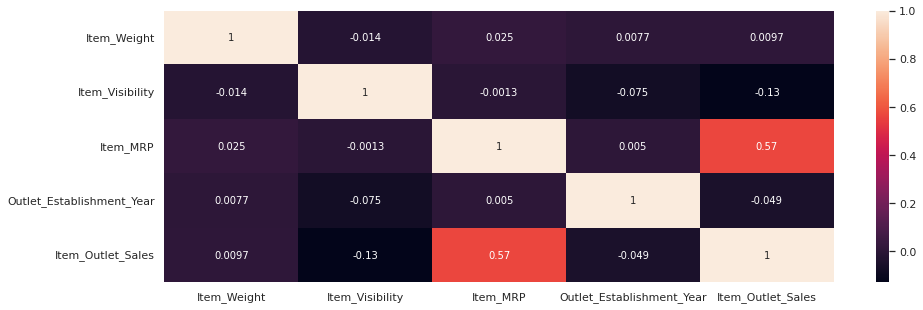

In [42]:
# Correlation matrix
corr = train_data.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True )

- Item_MRP is highly correlated with Item_Outlet_Sales

In [43]:
# Remove Item_Identifier, Item_Visibility, Outlet_Establishment_Year
def drop_extra_columns(df):
  df = df.drop(['Item_Identifier', 'Item_Visibility', 'Outlet_Establishment_Year'], axis = 1)
  print("3 columns-Item_Identifier, Item_Visibility, Outlet_Establishment_Year have been dropped.")
  return df

# Function to delete columns - Item_Identifier, Item_Visibility, Outlet_Establishment_Year
train_data_final = drop_extra_columns(train_data)
train_data_final.dtypes

3 columns-Item_Identifier, Item_Visibility, Outlet_Establishment_Year have been dropped.


Item_Weight             float64
Item_Fat_Content         object
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
Product                  object
Outlet_Age_Year          object
dtype: object

In [44]:
# Sample of final train data
train_data_final.sample(2)

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Product,Outlet_Age_Year
5121,17.75,Regular,Dairy,240.5538,OUT049,Medium,Tier 1,Supermarket Type1,3845.6608,FDB,10
8446,17.25,Low Fat,Frozen Foods,40.1822,OUT045,Medium,Tier 2,Supermarket Type1,510.6686,FDT,7


# Encoding Categorical Variables

In [45]:
# Split the data into X and y
def split_data(df):
  print("Shape of data - ", df.shape)
  X = df.drop(['Item_Outlet_Sales'], axis=1)
  y = df['Item_Outlet_Sales']
  print("Shape of X - ", X.shape)
  print("Shape of y - ", y.shape)
  return X, y

# Function to split data
X_train, y_train = split_data(train_data_final)

Shape of data -  (8523, 11)
Shape of X -  (8523, 10)
Shape of y -  (8523,)


In [46]:
X_train.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Product                  object
Outlet_Age_Year          object
dtype: object

In [47]:
# Categorical features
# Ordinal Data - Item_Fat_Content, Outlet_Size, Outlet_Location_Type, Outlet_Age_Year -> Label encoding : Retaining the order is important -> (1, 2, 3, 4)
# Nominal Data - Item_Type, Outlet_Identifier, Outlet_Type, Product -> One Hot Encoding/get_dummies() -> 4 different columns with 0 and 1(absence or presence)
cat_col_list = []
num_col_list = []
for col in X_train.columns.values:
  if train_data[col].dtype == 'object':
    cat_col_list.append(col)
  if train_data[col].dtype != 'object':
    num_col_list.append(col)

print("Categorical feature list - ", cat_col_list)
print("Numerical feature list - ", num_col_list)

# Categorical data
X_train_cat = X_train[cat_col_list]

# Numerical data
X_train_num = X_train[num_col_list]

Categorical feature list -  ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Product', 'Outlet_Age_Year']
Numerical feature list -  ['Item_Weight', 'Item_MRP']


- Ordinal Data - Item_Fat_Content, Outlet_Size, Outlet_Location_Type, Outlet_Age_Year
- Nominal Data - Item_Type, Outlet_Identifier, Outlet_Type, Product

# Label Encoding

In [48]:
# Categorical data is divided into Ordinal and Nominal data

# Ordinal Data - Item_Fat_Content, Outlet_Size, Outlet_Location_Type, Outlet_Age_Year -> Label encoding : Retaining the order is important -> (1, 2, 3, 4)
ord_col_list = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age_Year']
X_train_cat_ord = X_train_cat[ord_col_list]

# Nominal Data - Item_Type, Outlet_Identifier, Outlet_Type, Product -> One Hot Encoding/get_dummies() -> 4 different columns with 0 and 1(absence or presence)
nom_col_list = ['Item_Type', 'Outlet_Identifier', 'Outlet_Type', 'Product']
X_train_cat_nom = X_train_cat[nom_col_list]

In [49]:
# Ordinal data
X_train_cat_ord

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Age_Year
0,Low Fat,Medium,Tier 1,10
1,Regular,Medium,Tier 3,0
2,Low Fat,Medium,Tier 1,10
3,Regular,Medium,Tier 3,11
4,Low Fat,High,Tier 3,22
...,...,...,...,...
8518,Low Fat,High,Tier 3,22
8519,Regular,Medium,Tier 2,7
8520,Low Fat,Small,Tier 2,5
8521,Regular,Medium,Tier 3,0


In [50]:
# Nominal data
X_train_cat_nom

,Item_Type,Outlet_Identifier,Outlet_Type,Product
0,Dairy,OUT049,Supermarket Type1,FDA
1,Soft Drinks,OUT018,Supermarket Type2,DRC
2,Meat,OUT049,Supermarket Type1,FDN
3,Fruits and Vegetables,OUT010,Grocery Store,FDX
4,Household,OUT013,Supermarket Type1,NCD
...,...,...,...,...
8518,Snack Foods,OUT013,Supermarket Type1,FDF
8519,Baking Goods,OUT045,Supermarket Type1,FDS
8520,Health and Hygiene,OUT035,Supermarket Type1,NCJ
8521,Snack Foods,OUT018,Supermarket Type2,FDN


In [51]:
# Label Encoding
le = LabelEncoder()
X_train_cat_ord_le = X_train_cat_ord.apply(le.fit_transform)
X_train_cat_ord_le

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Age_Year
0,0,1,0,1
1,1,1,2,0
2,0,1,0,1
3,1,1,2,2
4,0,0,2,5
...,...,...,...,...
8518,0,0,2,5
8519,1,1,1,8
8520,0,2,1,7
8521,1,1,2,0


# One Hot Encoding

In [52]:
# One hot encoding using get_dummies() function
# On Label encoded Ordinal data
X_train_cat_ord_le_transformed = pd.get_dummies(X_train_cat_ord_le, columns=ord_col_list)

# On Nominal data
X_train_cat_nom_transformed = pd.get_dummies(X_train_cat_nom, columns=nom_col_list)

# PreProcessing Data

In [53]:
# Scaling numeric features
def scaling_data(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    return scaled_data

# Call scaling function for train data
X_train_num_scaled = scaling_data(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_col_list)
X_train_num_scaled

,Item_Weight,Item_MRP
0,-0.831187,1.747454
1,-1.630810,-1.489023
2,1.108727,0.010040
3,1.510904,0.660050
4,-0.918719,-1.399220
...,...,...
8518,-1.407246,1.180783
8519,-1.048835,-0.527301
8520,-0.523639,-0.897208
8521,-1.325628,-0.607977


In [54]:
frames = [X_train_num_scaled,  X_train_cat_ord_le_transformed, X_train_cat_nom_transformed]
X_train_transformed = pd.concat(frames, axis= 1)
print("Shape of final train X - ", X_train_transformed.shape)
X_train_transformed

Shape of final train X -  (8523, 120)


,Item_Weight,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Product_NCQ,Product_NCR,Product_NCS,Product_NCT,Product_NCU,Product_NCV,Product_NCW,Product_NCX,Product_NCY,Product_NCZ
0,-0.831187,1.747454,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.630810,-1.489023,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.108727,0.010040,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.510904,0.660050,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.918719,-1.399220,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.407246,1.180783,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8519,-1.048835,-0.527301,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8520,-0.523639,-0.897208,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8521,-1.325628,-0.607977,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# All the preprocessing steps on test_data

# Function to get product name
test_data = get_product(test_data)

# Function to impute Item_Weight with median
test_data = imputer_Item_Weight(test_data)

# Function to impute imputr_Outlet_Size with most_frequent
test_data = imputer_Outlet_Size(test_data)

# Function to map correct values
test_data = preprocess_Item_Fat_Content(test_data)

# Call function to calculate age of Outlet
test_data = get_outlet_age(test_data)

# Function to delete columns - Item_Identifier, Item_Visibility, Outlet_Establishment_Year
test_data_final = drop_extra_columns(test_data)

# Split the data
X_test = test_data_final.copy()

# Get Categorical and Numerical data
X_test_cat = X_test[cat_col_list]
X_test_num = X_test[num_col_list]

# Divide Categorical data into ordinal and nominal
X_test_cat_ord = X_test_cat[['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age_Year']]
X_test_cat_nom = X_test_cat[['Item_Type', 'Outlet_Identifier', 'Outlet_Type', 'Product']]

# Label encoding on ordinal data
X_test_cat_ord_le = X_test_cat_ord.apply(le.fit_transform)

# Get dummies for Ordinal data
X_test_cat_ord_le_transformed = pd.get_dummies(X_test_cat_ord_le, columns=ord_col_list)

# Get dummies for nominal data
X_test_cat_nom_transformed = pd.get_dummies(X_test_cat_nom, columns=nom_col_list)

# Scaling the data
X_test_num_scaled = scaling_data(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_col_list)

# Merge all 3 dataframe
frames = [X_test_num_scaled,  X_test_cat_ord_le_transformed, X_test_cat_nom_transformed]
X_test_transformed = pd.concat(frames, axis= 1)

print("Shape of final test X - ", X_test_transformed.shape)
X_test_transformed

Sample of Item_Identifier -  FDW14
Sample of Product -  FDW
Before Imputing the Item_Weight -  976
After Imputing the Item_Weight -  0
Before Imputing the imputr_Outlet_Size -  1606
After Imputing the imputr_Outlet_Size -  0
Before - Mapping correct values - Item_Fat_Content :
 Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64
After - Mapping correct values - Item_Fat_Content :
 Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64
Sample of Outlet_Establishment_Year -  2007
Sample of Outlet_Age_Year -  2
Unique values of Outlet_Age_Year -
 24    976
22    621
10    620
12    620
5     620
7     619
0     618
2     617
11    370
Name: Outlet_Age_Year, dtype: int64
3 columns-Item_Identifier, Item_Visibility, Outlet_Establishment_Year have been dropped.
Shape of final test X -  (5681, 120)


,Item_Weight,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Product_NCQ,Product_NCR,Product_NCS,Product_NCT,Product_NCU,Product_NCV,Product_NCW,Product_NCX,Product_NCY,Product_NCZ
0,1.905090,-0.536555,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.027457,-0.868937,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.456482,1.629848,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-1.259469,0.226697,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.038164,1.508110,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-0.509256,0.004727,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5677,-1.192339,0.455014,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5678,-0.627029,-0.360485,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5679,0.621365,1.190844,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Modeling

In [57]:
print("Shape of train data - ", X_train_transformed.shape, y_train.shape)
print("Shape of test data - ", X_test_transformed.shape)

Shape of train data -  (8523, 120) (8523,)
Shape of test data -  (5681, 120)


# Linear Regression

In [58]:
#  Linear regression
model_lr = LinearRegression()

In [59]:
# Function to fit the model and print the metrics
def model_fit_metrics(model, X, y):
  # Fit the model
  model.fit(X, y)

  # Metrics for Regression
  # Score
  y_pred = model.predict(X)
  print("Score - ", metrics.r2_score(y, y_pred))

  # Mean Squared Error (MSE) - Mean or average of the squared difference between predicted and expected target values in a dataset
  print("MSE - ", mean_squared_error(y, y_pred))

  # Root Mean Squared Error (RMSE) - Extension of the MSE
  print("RMSE - ", np.sqrt(mean_squared_error(y, y_pred)))

  # Mean Absolute Error (MAE) - Average of the absolute error values
  print("MAE - ", np.sqrt(mean_absolute_error(y, y_pred)))
  return model

# Call function to fit the model and print the metrics
model_lr = model_fit_metrics(model_lr, X_train_transformed, y_train)

Score -  0.5662203050223101
MSE -  1263079.3940712893
RMSE -  1123.8680501158885
MAE -  28.878651793980815


# Regularized Linear Regression

In [60]:
# Ridge Linear Regression
model_ridge = Ridge(normalize=True)

# Call function to fit the model and print the metrics
model_ridge = model_fit_metrics(model_ridge, X_train_transformed, y_train)

Score -  0.4681876749129007
MSE -  1548530.7337062075
RMSE -  1244.3997483550884
MAE -  30.480238188645856


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [61]:
# Lasso Regression
model_lasso = Lasso(normalize=True)

# Call function to fit the model and print the metrics
model_lasso = model_fit_metrics(model_lasso, X_train_transformed, y_train)

Score -  0.5508312643681974
MSE -  1307889.1912328068
RMSE -  1143.6298313846166
MAE -  29.040026885184215


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


# RandomForest

In [62]:
# Random Forest Regression
model_rfr = RandomForestRegressor()

# Call function to fit the model and print the metrics
model_rfr = model_fit_metrics(model_rfr, X_train_transformed, y_train)

Score -  0.9379488319650183
MSE -  180680.54505656703
RMSE -  425.06534210232553
MAE -  17.18192426105654


- Overfitting the training data

# XGBoost

In [63]:
# XSGBoost Regression
model_xgbr = xgb.XGBRegressor()

# Call function to fit the model and print the metrics
model_xgbr = model_fit_metrics(model_xgbr, X_train_transformed, y_train)

[15:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Score -  0.6289297634963424
MSE -  1080482.0394025946
RMSE -  1039.4623799842852
MAE -  27.035029101877


# GradientBoostingRegressor

In [64]:
# Gradient Boosting Regression
model_gbr = GradientBoostingRegressor()

# Call function to fit the model and print the metrics
model_gbr = model_fit_metrics(model_gbr, X_train_transformed, y_train)

Score -  0.6311055353555073
MSE -  1074146.628517001
RMSE -  1036.4104536895607
MAE -  27.031936798129035


In [65]:
# Prediction for test data
y_test_pred_gbr = model_gbr.predict(X_test_transformed)
y_test_pred_df = pd.DataFrame(y_test_pred_gbr, columns=['Predicted_Item_Outlet_Sales'])
y_test_pred_df

,Predicted_Item_Outlet_Sales
0,1516.946083
1,1382.585847
2,614.507896
3,2504.321064
4,6363.476873
...,...
5676,2160.411737
5677,2452.855809
5678,1822.857572
5679,3567.121758


In [66]:
# Sample of test data
test_data.sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Product,Outlet_Age_Year
5543,FDY22,16.5,Regular,0.00000,Snack Foods,145.5128,OUT049,1999,Medium,Tier 1,Supermarket Type1,FDY,10
4212,FDL26,18.0,Low Fat,0.12251,Canned,154.8972,OUT010,1998,Medium,Tier 3,Grocery Store,FDL,11


In [67]:
# Sample of final test data
test_data_final.sample(2)

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Product,Outlet_Age_Year
738,15.1,Regular,Fruits and Vegetables,222.7456,OUT017,Medium,Tier 2,Supermarket Type1,FDQ,2
318,18.7,Regular,Frozen Foods,231.2010,OUT045,Medium,Tier 2,Supermarket Type1,FDP,7


In [68]:
# Final prediction for submission
frames = [test_data_final['Product'], test_data['Item_Identifier'],  test_data_final['Outlet_Identifier'], test_data_final['Outlet_Location_Type'], y_test_pred_df['Predicted_Item_Outlet_Sales']]
test_prediction_df = pd.concat(frames, axis= 1)
test_prediction_df

,Product,Item_Identifier,Outlet_Identifier,Outlet_Location_Type,Predicted_Item_Outlet_Sales
0,FDW,FDW58,OUT049,Tier 1,1516.946083
1,FDW,FDW14,OUT017,Tier 2,1382.585847
2,NCN,NCN55,OUT010,Tier 3,614.507896
3,FDQ,FDQ58,OUT017,Tier 2,2504.321064
4,FDY,FDY38,OUT027,Tier 3,6363.476873
...,...,...,...,...,...
5676,FDB,FDB58,OUT046,Tier 1,2160.411737
5677,FDD,FDD47,OUT018,Tier 3,2452.855809
5678,NCO,NCO17,OUT045,Tier 2,1822.857572
5679,FDJ,FDJ26,OUT017,Tier 2,3567.121758


In [70]:
# Svae final prediction into csv file
test_prediction_df.to_csv(test_data_prediction_file_path)

In [69]:
# Save GradientBoostingRegressor model
pickle.dump(model_gbr, open(model_gbr_file_path, "wb"))

# Summary

##### Models trained on traing data


- Linear Regression
- Ridge Regression
- Lasso Regression
- RandomForestRegression
- XGBoost Regression
- GradientBoosting Regression


#### GradientBoosting regressor is giving stable score with train data

# Curriculum For This Project
- The Business Problem Exploring 
- The Dataset 
- Exploratory Data Analysis (eda) - Outliers
- Exploratory Data Analysis (eda) - Graphs
- Converting Categorical To Numerical
- Seperating Training And Test Data
- Running The Models
- Hyper Parameter Tuning XGB And GBR
- Standard Scaling 06m Robust Scaling
- Final Predictions On The Test Dataset
- Saving The Final Model